# IMPORTING LIBRARIES

In [1]:
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.append("../")
from helper_functions import *

# IMPORTING DATA

In [19]:
x_train = np.load("Data/xtrain.npy")
y_test = np.load("Data/ytest.npy")
x_test = np.load("Data/xtest.npy")
y_train = np.load("Data/ytrain.npy")

In [4]:
x = np.vstack([x_train, x_test])
y = np.hstack([y_train, y_test])

In [5]:
x = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)
x.shape, y.shape

((7874, 768), (7874,))

In [6]:
from sklearn.utils import shuffle

x,y = shuffle(x,y)
x_test, y_test = shuffle(x_test, y_test)

In [7]:
from sklearn.utils import compute_class_weight

weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
weights = {index:value for index,value in enumerate(weights)}
weights

{0: 0.6519291273389634,
 1: 1.3608710680954026,
 2: 1.2602432778489117,
 3: 2.074835309617918,
 4: 0.6133831892186647,
 5: 1.5328012458633444,
 6: 2.309090909090909,
 7: 0.7755343248300994,
 8: 1.1202162469768104,
 9: 0.741012610577828,
 10: 0.8275354703100368}

# FINE-TUNING

## Logistic Regression

### Training Finetuned Model

                 Model Performance
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       208
           1       0.64      0.74      0.68       106
           2       0.53      0.51      0.52       106
           3       0.51      0.48      0.50        56
           4       0.71      0.87      0.78       235
           5       0.72      0.69      0.71        95
           6       0.63      0.45      0.53        58
           7       0.73      0.78      0.75       206
           8       0.80      0.71      0.75       129
           9       0.56      0.40      0.47       188
          10       0.91      0.95      0.93       188

    accuracy                           0.70      1575
   macro avg       0.67      0.66      0.66      1575
weighted avg       0.70      0.70      0.69      1575

Accuracy = 70.22%


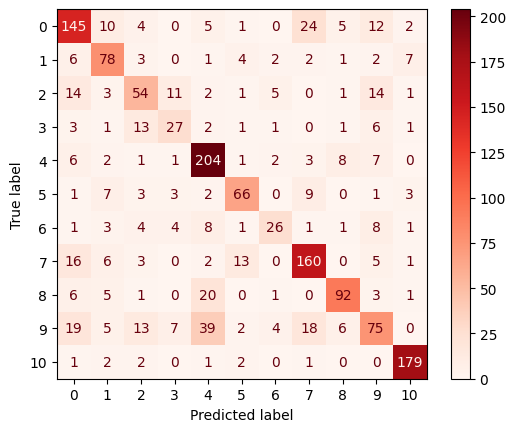

In [20]:
lreg_ft = LogisticRegression(C=0.3, max_iter=2000, penalty='l2', solver='liblinear')
lreg_ft.fit(x_train, y_train)
performance(lreg_ft, x_test, y_test)

In [22]:
roc_auc_score(y_test, lreg_ft.predict_proba(x_test), multi_class='ovr')

0.9471621675974664

                 Model Performance
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       208
           1       0.66      0.75      0.70       106
           2       0.55      0.51      0.53       106
           3       0.50      0.45      0.47        56
           4       0.77      0.83      0.80       235
           5       0.68      0.68      0.68        95
           6       0.60      0.55      0.58        58
           7       0.73      0.76      0.75       206
           8       0.80      0.72      0.76       129
           9       0.51      0.46      0.48       188
          10       0.91      0.95      0.93       188

    accuracy                           0.70      1575
   macro avg       0.67      0.67      0.67      1575
weighted avg       0.70      0.70      0.70      1575

Accuracy = 70.1%


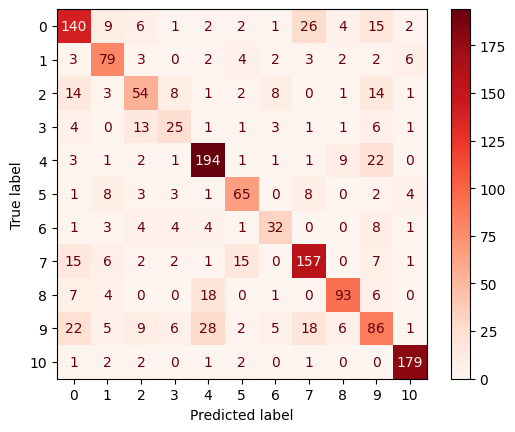

In [39]:
gr = LogisticRegression()
gr.fit(x_train, y_train)
performance(gr, x_test, y_test)

### Comparison with standard model using cross_validate

In [21]:
from sklearn.model_selection import cross_validate

model = joblib.load("Models/Initial/Unweighted/Logistic Regression.pk1")
cv4 = cross_validate(model, x, y, cv=5, scoring='f1_weighted', n_jobs=2)
cv4['test_score'].mean()

0.6708896713962726

In [22]:
model = joblib.load("Models/Initial/Weighted/Logistic Regression.pk1")
cv4 = cross_validate(model, x, y, cv=5, scoring='f1_weighted', n_jobs=2)
cv4['test_score'].mean()

0.6600781535713869

In [23]:
model = LogisticRegression(C=0.3, max_iter=2000, penalty='l2', solver='liblinear')
cv4 = cross_validate(model, x, y, cv=5, scoring='f1_weighted', n_jobs=2)
cv4['test_score'].mean()

0.6728840114412727

In [25]:
model = LogisticRegression(class_weight=weights ,C=0.3, max_iter=2000, penalty='l2', solver='liblinear')
cv4 = cross_validate(model, x, y, cv=5, scoring='f1_weighted', n_jobs=2)
cv4['test_score'].mean()

0.6703770763597146

In [28]:
model = LogisticRegression(class_weight = weights, max_iter = 1000)
cv4 = cross_validate(model, x, y, cv=5, scoring='f1_weighted', n_jobs=2)
cv4['test_score'].mean()

0.6660111652223974

In [30]:
model = LogisticRegression(class_weight = weights, max_iter = 3000)
cv4 = cross_validate(model, x, y, cv=5, scoring='f1_weighted', n_jobs=3)
cv4['test_score'].mean()

0.6661316381489839

In [32]:
model = LogisticRegression(C=0.3, max_iter=2000, penalty='l2', solver='liblinear')
cv4 = cross_validate(model, x, y, cv=5, scoring='accuracy', n_jobs=2)
cv4['test_score'].mean()

0.6799582904741737

In [33]:
model = LogisticRegression()
cv4 = cross_validate(model, x, y, cv=5, scoring='accuracy', n_jobs=2)
cv4['test_score'].mean()

0.6742435207034954

## LightGBM

### Training Finetuned Model

                 Model Performance
              precision    recall  f1-score   support

           0       0.64      0.67      0.66       208
           1       0.65      0.72      0.68       106
           2       0.51      0.45      0.48       106
           3       0.57      0.41      0.48        56
           4       0.68      0.79      0.73       235
           5       0.72      0.72      0.72        95
           6       0.55      0.38      0.45        58
           7       0.71      0.77      0.74       206
           8       0.74      0.67      0.71       129
           9       0.50      0.45      0.47       188
          10       0.93      0.95      0.94       188

    accuracy                           0.68      1575
   macro avg       0.66      0.63      0.64      1575
weighted avg       0.67      0.68      0.67      1575

Accuracy = 67.87%


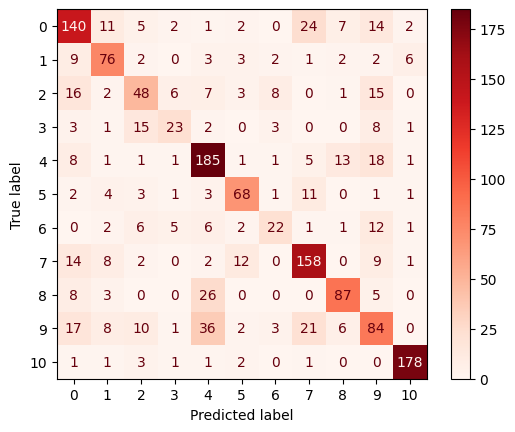

In [36]:
light = LGBMClassifier(colsample_bytree=0.8, max_depth=7, learning_rate=0.1, n_estimators=300, subsample=0.8)
light.fit(x_train, y_train)
performance(light, x_test, y_test)

In [37]:
light_weighted = LGBMClassifier(class_weight=weights, colsample_bytree=0.8, max_depth=7, learning_rate=0.1, n_estimators=300, subsample=0.8)

In [38]:
light_default = LGBMClassifier()
light_def_w = LGBMClassifier(class_weight = weights)

In [39]:
cvld = cross_validate(light_default, x, y, scoring='f1_weighted', n_jobs = 3)
cvld['test_score'].mean()

0.644975856590887

In [40]:
cvldw = cross_validate(light_def_w, x, y, scoring='f1_weighted', n_jobs = 3)
cvldw['test_score'].mean()

0.6553677280866055

In [41]:
cvlw = cross_validate(light_weighted, x, y, scoring='f1_weighted', n_jobs = 3)
cvlw['test_score'].mean()

0.66350711949183

In [42]:
cvl = cross_validate(light, x, y, scoring='f1_weighted', n_jobs = 3)
cvl['test_score'].mean()

0.660406101978489

In [44]:
cvlw = cross_validate(light_weighted, x, y, scoring='accuracy', n_jobs = 3)
cvlw['test_score'].mean()

0.6691622193985598

In [45]:
cvld = cross_validate(light_default, x, y, scoring='accuracy', n_jobs = 3)
cvld['test_score'].mean()

0.6508756983521913

# Evaluation Set

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,shuffle=True, stratify=y, test_size=0.2, random_state=1)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, shuffle=True, stratify=y_train, test_size=0.125, random_state=1)

In [42]:
x_train.shape, x_test.shape, x_valid.shape

((5511, 768), (1575, 768), (788, 768))

## CatBoost

### Training

In [43]:
cat = CatBoostClassifier(use_best_model=True, early_stopping_rounds=50, task_type='GPU')
cat.fit(x_train, y_train, eval_set=(x_valid, y_valid))

Learning rate set to 0.124938
0:	learn: 2.1890638	test: 2.1936134	best: 2.1936134 (0)	total: 93.2ms	remaining: 1m 33s
1:	learn: 2.0551080	test: 2.0573569	best: 2.0573569 (1)	total: 224ms	remaining: 1m 51s
2:	learn: 1.9548832	test: 1.9627023	best: 1.9627023 (2)	total: 311ms	remaining: 1m 43s
3:	learn: 1.8643172	test: 1.8827185	best: 1.8827185 (3)	total: 392ms	remaining: 1m 37s
4:	learn: 1.7942482	test: 1.8174012	best: 1.8174012 (4)	total: 468ms	remaining: 1m 33s
5:	learn: 1.7306484	test: 1.7542763	best: 1.7542763 (5)	total: 549ms	remaining: 1m 30s
6:	learn: 1.6758622	test: 1.7043053	best: 1.7043053 (6)	total: 623ms	remaining: 1m 28s
7:	learn: 1.6300878	test: 1.6650711	best: 1.6650711 (7)	total: 702ms	remaining: 1m 26s
8:	learn: 1.5863344	test: 1.6269277	best: 1.6269277 (8)	total: 781ms	remaining: 1m 26s
9:	learn: 1.5469705	test: 1.5936279	best: 1.5936279 (9)	total: 861ms	remaining: 1m 25s
10:	learn: 1.5080790	test: 1.5654762	best: 1.5654762 (10)	total: 944ms	remaining: 1m 24s
11:	learn:

### Evaluation

                 Model Performance
              precision    recall  f1-score   support

           0       0.61      0.71      0.66       220
           1       0.70      0.72      0.71       105
           2       0.48      0.46      0.47       114
           3       0.52      0.36      0.43        69
           4       0.75      0.77      0.76       233
           5       0.68      0.74      0.71        93
           6       0.50      0.40      0.45        62
           7       0.68      0.71      0.69       185
           8       0.74      0.66      0.70       128
           9       0.48      0.43      0.45       193
          10       0.90      0.94      0.92       173

    accuracy                           0.66      1575
   macro avg       0.64      0.63      0.63      1575
weighted avg       0.66      0.66      0.66      1575

Accuracy = 66.35%


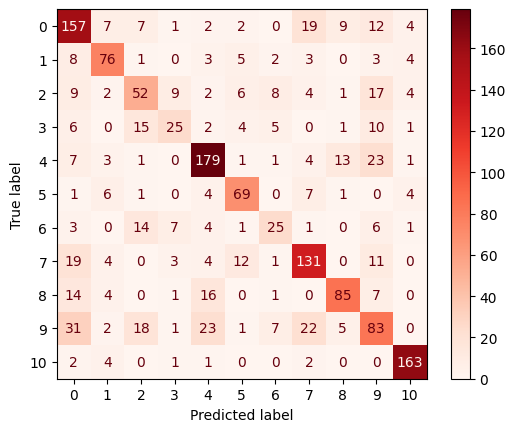

In [44]:
performance(cat, x_test, y_test)

In [45]:
f1_score(y_test, cat.predict(x_test), average='weighted')

0.6584167794142708

In [46]:
roc_auc_score(y_test, cat.predict_proba(x_test), multi_class='ovr')

0.9401951740892387

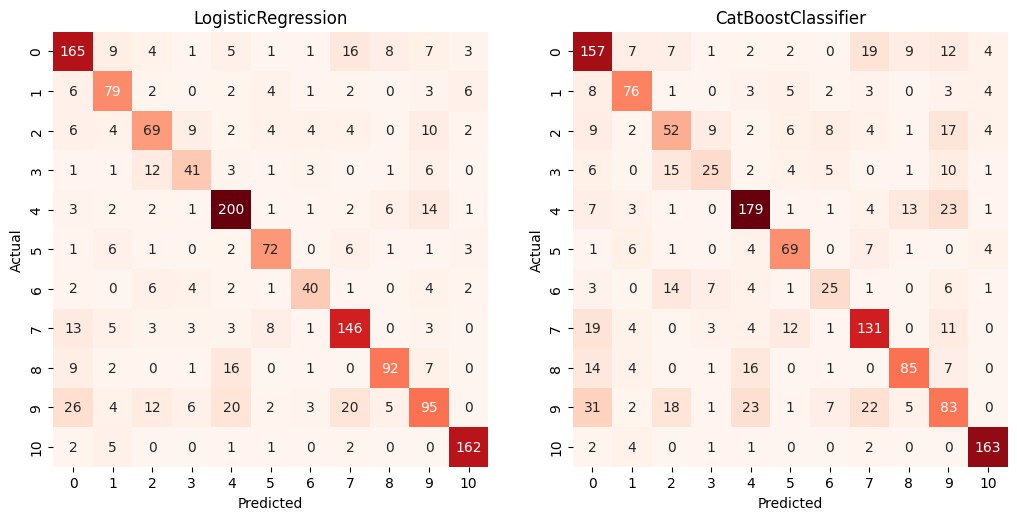

In [47]:
compare_heatmaps(
    {
        'LogisticRegression':lreg_ft,
        'CatBoostClassifier':cat,
    },
    x_test,y_test
)

In [48]:
compare_performance(
    {
        'LogisticRegression':lreg_ft,
        'CatBoostClassifier':cat,
    },
    x_test,y_test
)

,Name,Accuracy,Precision_0,Precision_1,Precision_2,Precision_3,Precision_4,Precision_5,Precision_6,Precision_7,...,f1-score_1,f1-score_2,f1-score_3,f1-score_4,f1-score_5,f1-score_6,f1-score_7,f1-score_8,f1-score_9,f1-score_10
0,LogisticRegression,0.737,0.705,0.675,0.622,0.621,0.781,0.758,0.727,0.734,...,0.712,0.613,0.607,0.818,0.766,0.684,0.760,0.763,0.554,0.920
1,CatBoostClassifier,0.663,0.611,0.704,0.477,0.521,0.746,0.683,0.500,0.679,...,0.714,0.466,0.427,0.757,0.711,0.446,0.693,0.700,0.455,0.918


### Standard

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y,shuffle=True, stratify=y, test_size=0.2, random_state=1)

Learning rate set to 0.094479
0:	learn: 2.2536592	total: 126ms	remaining: 2m 5s
1:	learn: 2.1518633	total: 243ms	remaining: 2m 1s
2:	learn: 2.0731063	total: 316ms	remaining: 1m 45s
3:	learn: 1.9992740	total: 396ms	remaining: 1m 38s
4:	learn: 1.9374041	total: 471ms	remaining: 1m 33s
5:	learn: 1.8811493	total: 551ms	remaining: 1m 31s
6:	learn: 1.8330605	total: 632ms	remaining: 1m 29s
7:	learn: 1.7858512	total: 708ms	remaining: 1m 27s
8:	learn: 1.7449859	total: 783ms	remaining: 1m 26s
9:	learn: 1.7035944	total: 864ms	remaining: 1m 25s
10:	learn: 1.6668918	total: 946ms	remaining: 1m 25s
11:	learn: 1.6315858	total: 1.03s	remaining: 1m 24s
12:	learn: 1.5975305	total: 1.11s	remaining: 1m 24s
13:	learn: 1.5701801	total: 1.19s	remaining: 1m 23s
14:	learn: 1.5387236	total: 1.27s	remaining: 1m 23s
15:	learn: 1.5133038	total: 1.35s	remaining: 1m 23s
16:	learn: 1.4868662	total: 1.43s	remaining: 1m 22s
17:	learn: 1.4622413	total: 1.52s	remaining: 1m 22s
18:	learn: 1.4402446	total: 1.6s	remaining: 1m

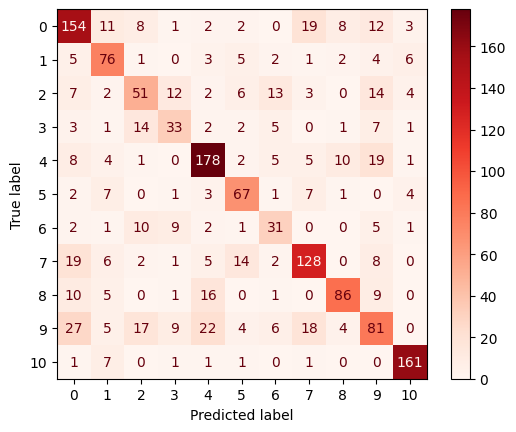

In [50]:
def_cat = CatBoostClassifier(class_weights=weights, task_type='GPU')
def_cat.fit(x_train, y_train)
performance(def_cat, x_test, y_test)

In [51]:
f1_score(y_test, def_cat.predict(x_test), average='weighted')

0.6609751549012564

### Cross Validation

In [53]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

cat_st_acc = []
cat_st_f1 = []
cat_es_acc = []
cat_es_f1 = []

for train_index, test_index in skf.split(x,y):
    x_train_fold, x_test_fold = x[train_index], x[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    def_cat = CatBoostClassifier(class_weights=weights, task_type='GPU')
    def_cat.fit(x_train_fold, y_train_fold)
    
    pred = def_cat.predict(x_test_fold)
    cat_st_acc.append(accuracy_score(y_test_fold, pred))
    cat_st_f1.append(f1_score(y_test_fold, pred, average='weighted'))

    x_train_fold, x_valid_fold, y_train_fold, y_valid_fold = train_test_split(x_train_fold, y_train_fold, test_size=0.125, stratify=y_train_fold)
    cat_w = CatBoostClassifier(class_weights=weights, task_type='GPU', early_stopping_rounds=50, use_best_model=True)
    cat_w.fit(x_train_fold, y_train_fold, eval_set=(x_valid_fold, y_valid_fold))
    
    pred = cat_w.predict(x_test_fold)
    cat_es_acc.append(accuracy_score(y_test_fold, pred))
    cat_es_f1.append(f1_score(y_test_fold, pred, average='weighted'))

Learning rate set to 0.094479
0:	learn: 2.2553312	total: 86.3ms	remaining: 1m 26s
1:	learn: 2.1548779	total: 165ms	remaining: 1m 22s
2:	learn: 2.0734388	total: 233ms	remaining: 1m 17s
3:	learn: 2.0020361	total: 311ms	remaining: 1m 17s
4:	learn: 1.9404963	total: 384ms	remaining: 1m 16s
5:	learn: 1.8826533	total: 464ms	remaining: 1m 16s
6:	learn: 1.8315069	total: 546ms	remaining: 1m 17s
7:	learn: 1.7862763	total: 624ms	remaining: 1m 17s
8:	learn: 1.7425898	total: 704ms	remaining: 1m 17s
9:	learn: 1.7020531	total: 786ms	remaining: 1m 17s
10:	learn: 1.6663222	total: 869ms	remaining: 1m 18s
11:	learn: 1.6342341	total: 948ms	remaining: 1m 18s
12:	learn: 1.6018015	total: 1.03s	remaining: 1m 18s
13:	learn: 1.5703913	total: 1.11s	remaining: 1m 18s
14:	learn: 1.5423582	total: 1.2s	remaining: 1m 18s
15:	learn: 1.5141306	total: 1.28s	remaining: 1m 18s
16:	learn: 1.4872995	total: 1.36s	remaining: 1m 18s
17:	learn: 1.4622255	total: 1.44s	remaining: 1m 18s
18:	learn: 1.4369077	total: 1.52s	remaining:

In [54]:
print(cat_st_acc)
print(cat_st_f1)
print(cat_es_acc)
print(cat_es_f1)

[0.6482539682539683, 0.6463492063492063, 0.6647619047619048, 0.6844444444444444, 0.6715374841168996]
[0.6448423700273604, 0.641991447852647, 0.662223182280712, 0.6809645719868441, 0.6653953044596628]
[0.6285714285714286, 0.64, 0.659047619047619, 0.6501587301587302, 0.6556543837357052]
[0.6240300862043071, 0.6382779613091658, 0.6570702359169611, 0.6483812746489349, 0.6529927876354333]


In [57]:
print(np.mean(cat_st_acc))
print(np.mean(cat_st_f1))
print(np.mean(cat_es_acc))
print(np.mean(cat_es_f1))

0.6630694015852847
0.6590833753214452
0.6466864323026966
0.6441504691429605


## LightGBM

### Training

In [30]:
light = LGBMClassifier(class_weight=weights, colsample_bytree=0.8, max_depth=7, learning_rate=0.1, n_estimators=500, subsample=0.8)
light.fit(x_train, y_train, eval_set=(x_valid, y_valid), early_stopping_rounds=50, verbose=1)

[1]	valid_0's multi_logloss: 2.0901
[2]	valid_0's multi_logloss: 1.92111
[3]	valid_0's multi_logloss: 1.80491
[4]	valid_0's multi_logloss: 1.70941
[5]	valid_0's multi_logloss: 1.63829
[6]	valid_0's multi_logloss: 1.56906
[7]	valid_0's multi_logloss: 1.50991
[8]	valid_0's multi_logloss: 1.45751
[9]	valid_0's multi_logloss: 1.4142
[10]	valid_0's multi_logloss: 1.37733
[11]	valid_0's multi_logloss: 1.34271
[12]	valid_0's multi_logloss: 1.31231
[13]	valid_0's multi_logloss: 1.2842
[14]	valid_0's multi_logloss: 1.26162
[15]	valid_0's multi_logloss: 1.2415
[16]	valid_0's multi_logloss: 1.22171
[17]	valid_0's multi_logloss: 1.20679
[18]	valid_0's multi_logloss: 1.19786
[19]	valid_0's multi_logloss: 1.18528
[20]	valid_0's multi_logloss: 1.17207
[21]	valid_0's multi_logloss: 1.16283
[22]	valid_0's multi_logloss: 1.15061
[23]	valid_0's multi_logloss: 1.14076
[24]	valid_0's multi_logloss: 1.13397
[25]	valid_0's multi_logloss: 1.12632
[26]	valid_0's multi_logloss: 1.12174
[27]	valid_0's multi_logl

LGBMClassifier(class_weight={0: 0.6519291273389634, 1: 1.3608710680954026,
                             2: 1.2602432778489117, 3: 2.074835309617918,
                             4: 0.6133831892186647, 5: 1.5328012458633444,
                             6: 2.309090909090909, 7: 0.7755343248300994,
                             8: 1.1202162469768104, 9: 0.741012610577828,
                             10: 0.8275354703100368},
               colsample_bytree=0.8, max_depth=7, n_estimators=500,
               subsample=0.8)

                 Model Performance
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       220
           1       0.65      0.68      0.66       105
           2       0.40      0.45      0.42       114
           3       0.42      0.41      0.41        69
           4       0.74      0.71      0.72       233
           5       0.71      0.71      0.71        93
           6       0.51      0.45      0.48        62
           7       0.67      0.71      0.69       185
           8       0.70      0.67      0.69       128
           9       0.39      0.37      0.38       193
          10       0.90      0.90      0.90       173

    accuracy                           0.63      1575
   macro avg       0.61      0.61      0.61      1575
weighted avg       0.63      0.63      0.63      1575

Accuracy = 62.98%


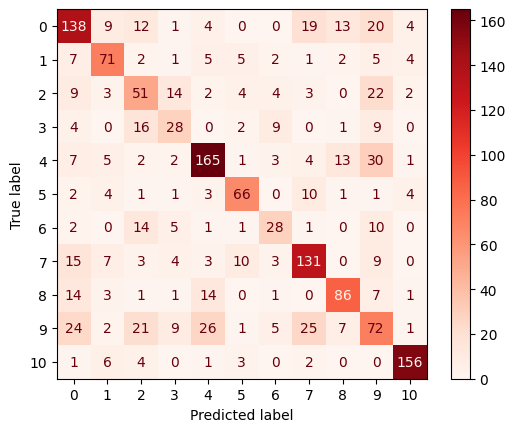

In [31]:
performance(light, x_test, y_test)

[1]	valid_0's multi_logloss: 2.02546
[2]	valid_0's multi_logloss: 1.85925
[3]	valid_0's multi_logloss: 1.74924
[4]	valid_0's multi_logloss: 1.65865
[5]	valid_0's multi_logloss: 1.58698
[6]	valid_0's multi_logloss: 1.52737
[7]	valid_0's multi_logloss: 1.47496
[8]	valid_0's multi_logloss: 1.42686
[9]	valid_0's multi_logloss: 1.38561
[10]	valid_0's multi_logloss: 1.34983
[11]	valid_0's multi_logloss: 1.31798
[12]	valid_0's multi_logloss: 1.29368
[13]	valid_0's multi_logloss: 1.27055
[14]	valid_0's multi_logloss: 1.24997
[15]	valid_0's multi_logloss: 1.23023
[16]	valid_0's multi_logloss: 1.21296
[17]	valid_0's multi_logloss: 1.19519
[18]	valid_0's multi_logloss: 1.18125
[19]	valid_0's multi_logloss: 1.17079
[20]	valid_0's multi_logloss: 1.16341
[21]	valid_0's multi_logloss: 1.15265
[22]	valid_0's multi_logloss: 1.14407
[23]	valid_0's multi_logloss: 1.13582
[24]	valid_0's multi_logloss: 1.12764
[25]	valid_0's multi_logloss: 1.12196
[26]	valid_0's multi_logloss: 1.11602
[27]	valid_0's multi_

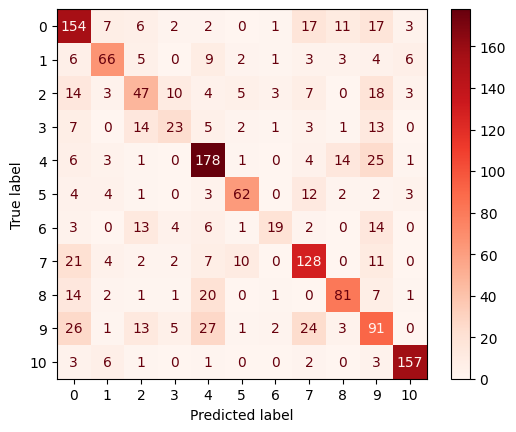

In [32]:
light_def = LGBMClassifier(n_estimators=500)
light_def.fit(x_train, y_train, eval_set=(x_valid, y_valid), early_stopping_rounds=50, verbose=1)
performance(light_def, x_test, y_test)

# Stacking Classifier

In [62]:
models = [
    ('Logistic Regression', LogisticRegression(C=0.3, max_iter=2000, penalty='l2', solver='liblinear')),
    ('SVC', SVC()),
    ('LightGBM', LGBMClassifier(class_weight=weights, colsample_bytree=0.8, max_depth=7, learning_rate=0.1, n_estimators=300, subsample=0.8)),
    ('CatBoostClassifier', CatBoostClassifier())
]

stc = StackingClassifier(models, cv=5, n_jobs=3)
stc.fit(x_train, y_train)
performance(stc, x_test, y_test)